In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
data = pd.read_csv('data.csv')
data = data.dropna() # Eksik gözlemleri çıkardık
dms = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
y = data['Salary']
X_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [6]:
data.shape

(263, 20)

In [7]:
modelLasso = Lasso().fit(X_train, y_train)

c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [8]:
modelLasso

Lasso()

In [9]:
modelLasso.intercept_

-5.587450677336506

In [11]:
modelLasso.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [14]:
# Farklı lambda değerlerine karşılık katsayılar
coefs = []
alphas = np.random.randint(0,100000,10)

for a in alphas:
    modelLasso.set_params(alpha=a)
    modelLasso.fit(X_train, y_train)
    coefs.append(modelLasso.coef_)

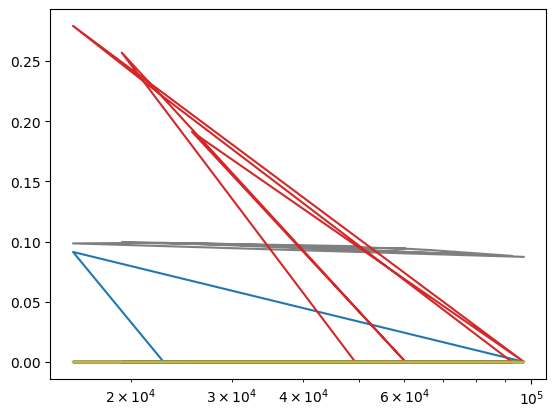

In [15]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')


c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

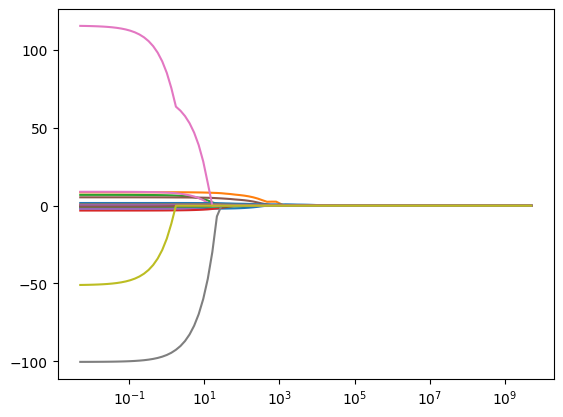

In [16]:
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    modelLasso.set_params(alpha=a)
    modelLasso.fit(X_train, y_train)
    coefs.append(modelLasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')


## PREDİCT

In [18]:
modelLasso = Lasso(alpha = 1).fit(X_train, y_train)

c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [19]:
modelLasso

Lasso(alpha=1)

In [20]:
modelLasso.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [21]:
modelLasso.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [22]:
y_pred = modelLasso.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554034

In [24]:
r2_score(y_test, y_pred)

0.41422798132366156

## MODEL TUNİNG

In [28]:
lassoCV = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassoCV.fit(X_train, y_train)
lassoCV.alpha_

563.4670501833853

In [29]:
lassoTunned = Lasso().set_params(alpha = lassoCV.alpha_).fit(X_train, y_train)
# lassoTunned = Lasso(alpha = lassoCV.alpha_).fit(X_train, y_train)

In [30]:
y_predTunned = lassoTunned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predTunned))

373.59572250697937

In [31]:
pd.Series(lassoTunned.coef_, index = X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64